# Initial setup

## Init data frame

In [45]:
!rm -rf /content/graph-edge-anomaly-detection/

In [46]:
!git clone https://github.com/MKasaei00/graph-edge-anomaly-detection.git

Cloning into 'graph-edge-anomaly-detection'...
remote: Enumerating objects: 278, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 278 (delta 16), reused 28 (delta 9), pack-reused 235 (from 1)
Receiving objects: 100% (278/278), 66.73 MiB | 19.33 MiB/s, done.
Resolving deltas: 100% (133/133), done.
Updating files: 100% (56/56), done.


In [47]:
!cd /content/graph-edge-anomaly-detection/datasets/DARPA/

In [48]:
# prompt: unrar file named meta.rar

!unrar x /content/graph-edge-anomaly-detection/datasets/DARPA/meta.rar /content/graph-edge-anomaly-detection/datasets/DARPA/
!unrar x /content/graph-edge-anomaly-detection/datasets/ISCX/meta.rar /content/graph-edge-anomaly-detection/datasets/ISCX/



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/graph-edge-anomaly-detection/datasets/DARPA/meta.rar

Extracting  /content/graph-edge-anomaly-detection/datasets/DARPA/merged_data.csv      21% 42% 63% 85%100%  OK 
All OK

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/graph-edge-anomaly-detection/datasets/ISCX/meta.rar

Extracting  /content/graph-edge-anomaly-detection/datasets/ISCX/merged_data.csv      72%100%  OK 
All OK


In [49]:
# prompt: import panda numpy and any library you might need

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

In [50]:
# prompt: create a df from csv file named mereged_data.csv

df_darpa = pd.read_csv('/content/graph-edge-anomaly-detection/datasets/DARPA/merged_data.csv')
print(df_darpa.head())

   score  label  min  q1  median  q3  max  sum
0    1.0      0    0   0       0   0    1    2
1    2.0      0    0   0       0   0    2    4
2    1.0      0    0   0       0   0    1    5
3    2.0      0    0   0       0   0    2    7
4    1.0      0    0   0       0   0    1    8


In [51]:
# prompt: create a df from csv file named mereged_data.csv

df_iscx = pd.read_csv('/content/graph-edge-anomaly-detection/datasets/ISCX/merged_data.csv')
print(df_iscx.head())

    score  label  min  q1  median  q3  max  sum
0  1.0000      1    0   0       0   0    1    1
1  1.0000      0    0   0       0   0    1    1
2  1.0000      0    0   0       0   0    1    2
3  1.2226      0    0   0       0   0    1    3
4  1.5756      0    0   0       0   0    1    4


## EMA : Exponential moving average

Initial code that calculates metrics

In [28]:
def detect_z_score_ema(df, alpha=0.05, threshold_z=3):
    scores = df['score'].values
    labels = df['label'].values
    mu, var = 0, 1
    preds = []

    for x in scores:
        z = (x - mu) / (np.sqrt(var) + 1e-6)
        preds.append(int(z > threshold_z))
        mu = alpha * x + (1 - alpha) * mu
        var = alpha * (x - mu) ** 2 + (1 - alpha) * var

    metrics = {
        'Precision': precision_score(labels, preds),
        'Recall': recall_score(labels, preds),
        'F1': f1_score(labels, preds),
        'AUC-ROC': roc_auc_score(labels, scores)
    }
    return metrics


### DARPA : dataset

Now try on darpa dataset

In [29]:
detect_z_score_ema(df_darpa, alpha=0.05, threshold_z=3)

{'Precision': 0.22693383038210624,
 'Recall': 0.0007116738254185194,
 'F1': 0.0014188979285765532,
 'AUC-ROC': np.float64(0.9707388010169093)}

In [30]:
detect_z_score_ema(df_darpa, alpha=0.01, threshold_z=3)

{'Precision': 0.2103499627699181,
 'Recall': 0.00020641463622251717,
 'F1': 0.00041242456371503287,
 'AUC-ROC': np.float64(0.9707388010169093)}

In [31]:
detect_z_score_ema(df_darpa, alpha=0.05, threshold_z=2)

{'Precision': 0.16964648516863065,
 'Recall': 0.00213538681189489,
 'F1': 0.004217684473184511,
 'AUC-ROC': np.float64(0.9707388010169093)}

In [32]:
detect_z_score_ema(df_darpa, alpha=0.05, threshold_z=1.5)

{'Precision': 0.1684434374013335,
 'Recall': 0.006626823161841131,
 'F1': 0.012751964483750718,
 'AUC-ROC': np.float64(0.9707388010169093)}

In [33]:
detect_z_score_ema(df_darpa, alpha=0.05, threshold_z=1)

{'Precision': 0.8757280681666848,
 'Recall': 0.8480441208544909,
 'F1': 0.8616637910810321,
 'AUC-ROC': np.float64(0.9707388010169093)}

Threshold Z: 0.80, Metrics: {'Precision': 0.8415337696168753, 'Recall': 0.8709901216896481, 'F1': 0.8560086129313534, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 0.90, Metrics: {'Precision': 0.8585724624167508, 'Recall': 0.8594846064001689, 'F1': 0.8590282922725432, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 1.00, Metrics: {'Precision': 0.8757280681666848, 'Recall': 0.8480441208544909, 'F1': 0.8616637910810321, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 1.10, Metrics: {'Precision': 0.19022819683013859, 'Recall': 0.02093775082574988, 'F1': 0.037723417335750326, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 1.20, Metrics: {'Precision': 0.18086722069589256, 'Recall': 0.015488769765114757, 'F1': 0.028533998202323115, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 1.30, Metrics: {'Precision': 0.17698852067489187, 'Recall': 0.011749924832192208, 'F1': 0.022036864916457316, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 1.40, M

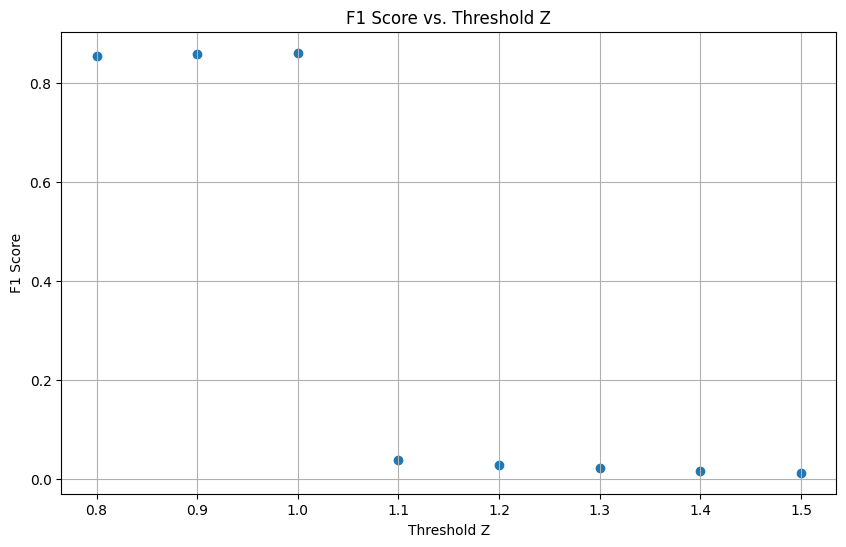

In [34]:
# prompt: generate linear values between 0.8 and 1.5 with distance of 0.01 and then plot scatter with x = threshold_z and y = F1
# also print all the inner results too

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

# ... (Your existing code for data loading and detect_z_score_ema function)

threshold_z_values = np.arange(0.8, 1.6, 0.1)
f1_scores = []

for threshold_z in threshold_z_values:
    metrics = detect_z_score_ema(df_darpa, alpha=0.05, threshold_z=threshold_z)
    f1_scores.append(metrics['F1'])
    print(f"Threshold Z: {threshold_z:.2f}, Metrics: {metrics}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(threshold_z_values, f1_scores)
plt.xlabel("Threshold Z")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Threshold Z")
plt.grid(True)
plt.show()


Threshold Z: 0.40, Metrics: {'Precision': 0.7816943619516569, 'Recall': 0.9224008835277102, 'F1': 0.846238579710383, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 0.45, Metrics: {'Precision': 0.7879143855349994, 'Recall': 0.9171820639198541, 'F1': 0.8476481697538936, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 0.50, Metrics: {'Precision': 0.7943794917167079, 'Recall': 0.9105735075399796, 'F1': 0.8485171384849501, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 0.55, Metrics: {'Precision': 0.8011834825923546, 'Recall': 0.9029219179098125, 'F1': 0.8490157081677904, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 0.60, Metrics: {'Precision': 0.8085386753531207, 'Recall': 0.8957525713235636, 'F1': 0.8499141198716738, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 0.65, Metrics: {'Precision': 0.8164799246926465, 'Recall': 0.8891557056841476, 'F1': 0.851269486504164, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 0.70, Metrics: {'Precis

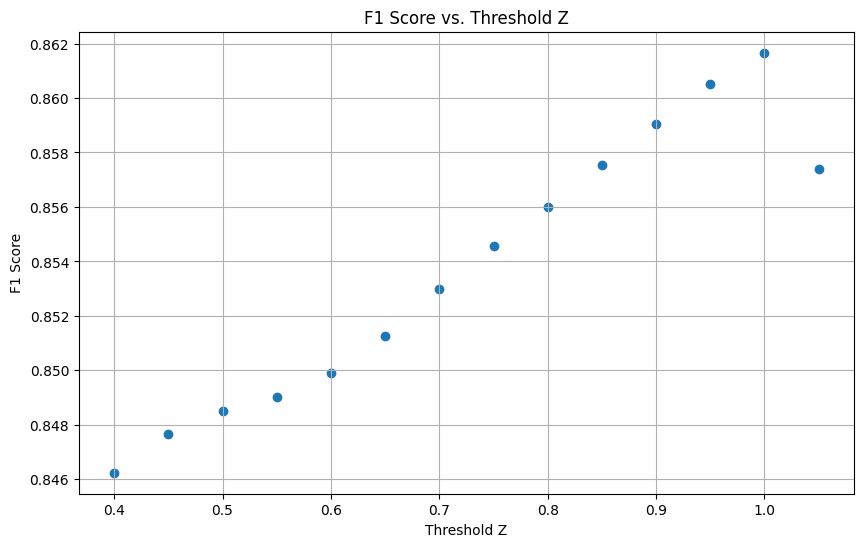

In [36]:
# prompt: generate linear values between 0.8 and 1.5 with distance of 0.01 and then plot scatter with x = threshold_z and y = F1
# also print all the inner results too

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

# ... (Your existing code for data loading and detect_z_score_ema function)

threshold_z_values = np.arange(0.4, 1.1, 0.05)
f1_scores = []

for threshold_z in threshold_z_values:
    metrics = detect_z_score_ema(df_darpa, alpha=0.05, threshold_z=threshold_z)
    f1_scores.append(metrics['F1'])
    print(f"Threshold Z: {threshold_z:.2f}, Metrics: {metrics}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(threshold_z_values, f1_scores)
plt.xlabel("Threshold Z")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Threshold Z")
plt.grid(True)
plt.show()


Threshold Z: 0.90, Metrics: {'Precision': 0.8585724624167508, 'Recall': 0.8594846064001689, 'F1': 0.8590282922725432, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 0.92, Metrics: {'Precision': 0.861968578033714, 'Recall': 0.857353603615946, 'F1': 0.8596548971081712, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 0.94, Metrics: {'Precision': 0.8654392705140199, 'Recall': 0.8550563731158272, 'F1': 0.8602164923085744, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 0.96, Metrics: {'Precision': 0.8688614272965383, 'Recall': 0.8529447331204888, 'F1': 0.8608295117780718, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 0.98, Metrics: {'Precision': 0.8722978630149303, 'Recall': 0.8506931695752864, 'F1': 0.8613600649869494, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 1.00, Metrics: {'Precision': 0.8757280681666848, 'Recall': 0.8480441208544909, 'F1': 0.8616637910810321, 'AUC-ROC': np.float64(0.9707388010169093)}
Threshold Z: 1.02, Metrics: {'Precis

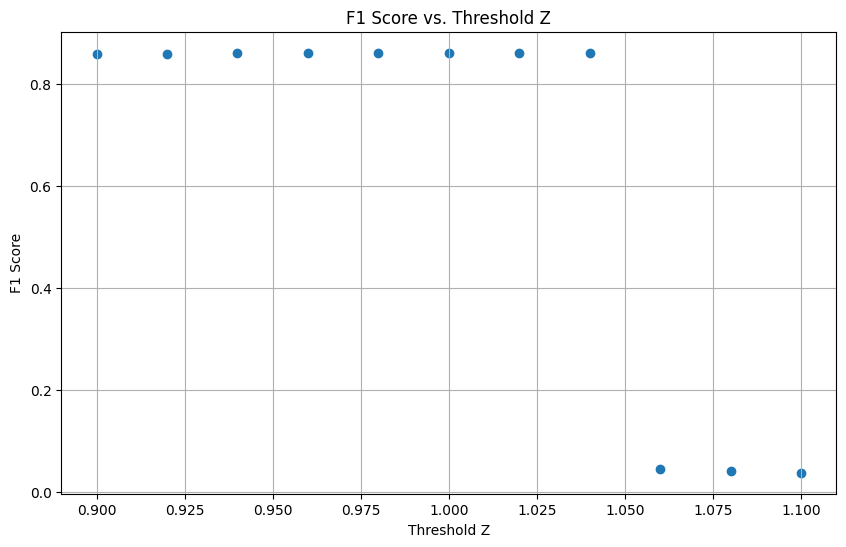

In [37]:
# prompt: generate linear values between 0.8 and 1.5 with distance of 0.01 and then plot scatter with x = threshold_z and y = F1
# also print all the inner results too

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

# ... (Your existing code for data loading and detect_z_score_ema function)

threshold_z_values = np.arange(0.9, 1.1, 0.02)
f1_scores = []

for threshold_z in threshold_z_values:
    metrics = detect_z_score_ema(df_darpa, alpha=0.05, threshold_z=threshold_z)
    f1_scores.append(metrics['F1'])
    print(f"Threshold Z: {threshold_z:.2f}, Metrics: {metrics}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(threshold_z_values, f1_scores)
plt.xlabel("Threshold Z")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Threshold Z")
plt.grid(True)
plt.show()


### ISCX Dataset

After testing on darpa dataset and defining that is it very good to have z = 1 and alpha = 0.05
So try on ISCX

and see if it is good

Threshold Z: 0.10, Metrics: {'Precision': 0.091809225853691, 'Recall': 0.9500602720854141, 'F1': 0.1674380491357987, 'AUC-ROC': np.float64(0.9539573500334358)}
Threshold Z: 0.20, Metrics: {'Precision': 0.09435023284421404, 'Recall': 0.9245737902531428, 'F1': 0.17122719734660033, 'AUC-ROC': np.float64(0.9539573500334358)}
Threshold Z: 0.30, Metrics: {'Precision': 0.09550215363278641, 'Recall': 0.8834380919579817, 'F1': 0.17237056247965643, 'AUC-ROC': np.float64(0.9539573500334358)}
Threshold Z: 0.40, Metrics: {'Precision': 0.09454743594506569, 'Recall': 0.8217237816428449, 'F1': 0.1695827067752676, 'AUC-ROC': np.float64(0.9539573500334358)}
Threshold Z: 0.50, Metrics: {'Precision': 0.09114205358044776, 'Recall': 0.7380316858963321, 'F1': 0.16224759723451276, 'AUC-ROC': np.float64(0.9539573500334358)}
Threshold Z: 0.60, Metrics: {'Precision': 0.08463670731426201, 'Recall': 0.6322757017392802, 'F1': 0.14928946084410832, 'AUC-ROC': np.float64(0.9539573500334358)}
Threshold Z: 0.70, Metrics

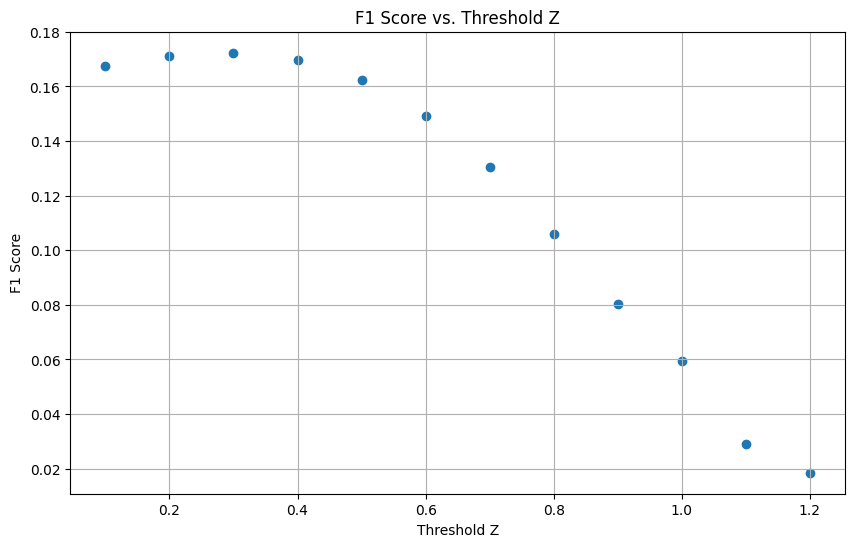

In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

threshold_z_values = np.arange(0.1, 1.3, 0.1)
f1_scores = []

for threshold_z in threshold_z_values:
    metrics = detect_z_score_ema(df_iscx, alpha=0.05, threshold_z=threshold_z)
    f1_scores.append(metrics['F1'])
    print(f"Threshold Z: {threshold_z:.2f}, Metrics: {metrics}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(threshold_z_values, f1_scores)
plt.xlabel("Threshold Z")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Threshold Z")
plt.grid(True)
plt.show()


Now try to log or power the scores to see if changes or no

In [54]:
def detect_z_score_ema_log2(df, alpha=0.05, threshold_z=3):
    scores = np.log2(df['score'])
    labels = df['label'].values
    mu, var = 0, 1
    preds = []

    for x in scores:
        z = (x - mu) / (np.sqrt(var) + 1e-6)
        preds.append(int(z > threshold_z))
        mu = alpha * x + (1 - alpha) * mu
        var = alpha * (x - mu) ** 2 + (1 - alpha) * var

    metrics = {
        'Precision': precision_score(labels, preds),
        'Recall': recall_score(labels, preds),
        'F1': f1_score(labels, preds),
        'AUC-ROC': roc_auc_score(labels, scores)
    }
    return metrics


Threshold Z: 0.10, Metrics: {'Precision': 0.08593987128998175, 'Recall': 0.962975718959876, 'F1': 0.15779727198653984, 'AUC-ROC': np.float64(0.9539573500334358)}
Threshold Z: 0.20, Metrics: {'Precision': 0.08880314363209604, 'Recall': 0.9422679524711555, 'F1': 0.16230957620566974, 'AUC-ROC': np.float64(0.9539573500334358)}
Threshold Z: 0.30, Metrics: {'Precision': 0.09051669389960625, 'Recall': 0.9050714654727053, 'F1': 0.16457422886409495, 'AUC-ROC': np.float64(0.9539573500334358)}
Threshold Z: 0.40, Metrics: {'Precision': 0.08985119260179103, 'Recall': 0.8395040468400207, 'F1': 0.16232854047911893, 'AUC-ROC': np.float64(0.9539573500334358)}
Threshold Z: 0.50, Metrics: {'Precision': 0.08600905411003688, 'Recall': 0.741863268469089, 'F1': 0.15414685636844247, 'AUC-ROC': np.float64(0.9539573500334358)}
Threshold Z: 0.60, Metrics: {'Precision': 0.07750745712155108, 'Recall': 0.6085543309798519, 'F1': 0.1375021886733721, 'AUC-ROC': np.float64(0.9539573500334358)}
Threshold Z: 0.70, Metric

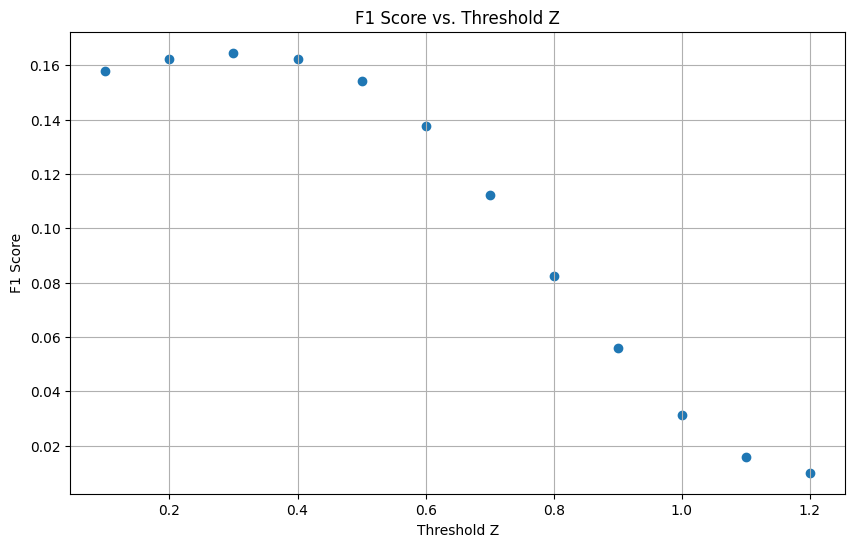

In [55]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

threshold_z_values = np.arange(0.1, 1.3, 0.1)
f1_scores = []

for threshold_z in threshold_z_values:
    metrics = detect_z_score_ema_log2(df_iscx, alpha=0.05, threshold_z=threshold_z)
    f1_scores.append(metrics['F1'])
    print(f"Threshold Z: {threshold_z:.2f}, Metrics: {metrics}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(threshold_z_values, f1_scores)
plt.xlabel("Threshold Z")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Threshold Z")
plt.grid(True)
plt.show()


In [56]:
def detect_z_score_ema_exp(df, alpha=0.05, threshold_z=3):
    scores = np.exp(df['score'])
    labels = df['label'].values
    mu, var = 0, 1
    preds = []

    for x in scores:
        z = (x - mu) / (np.sqrt(var) + 1e-6)
        preds.append(int(z > threshold_z))
        mu = alpha * x + (1 - alpha) * mu
        var = alpha * (x - mu) ** 2 + (1 - alpha) * var

    metrics = {
        'Precision': precision_score(labels, preds),
        'Recall': recall_score(labels, preds),
        'F1': f1_score(labels, preds),
        'AUC-ROC': roc_auc_score(labels, scores)
    }
    return metrics


In [58]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

threshold_z_values = np.arange(0.1, 1.3, 0.1)
f1_scores = []

for threshold_z in threshold_z_values:
    metrics = detect_z_score_ema_exp(df_iscx, alpha=0.05, threshold_z=threshold_z)
    f1_scores.append(metrics['F1'])
    print(f"Threshold Z: {threshold_z:.2f}, Metrics: {metrics}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(threshold_z_values, f1_scores)
plt.xlabel("Threshold Z")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Threshold Z")
plt.grid(True)
plt.show()


OverflowError: (34, 'Numerical result out of range')